<a href="https://colab.research.google.com/github/IoThang/AI/blob/main/Buoi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=835ba60994895728d4544a65f802685967ac5b68f26c226552816cd46a2e25df
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


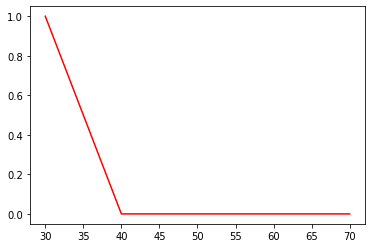

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(30,71,1)
slow = fuzz.trimf(x,[30,30,40])
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label='SLOW')

19.999999999999996


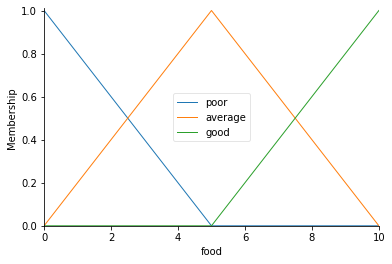

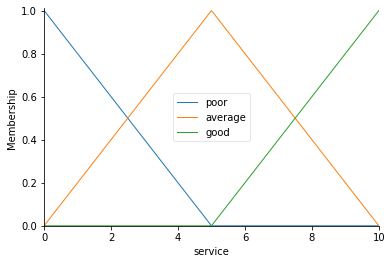

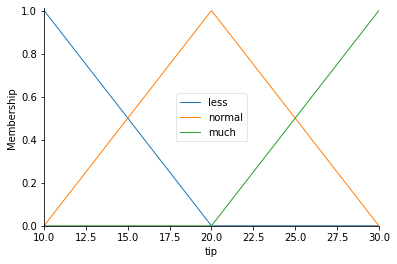

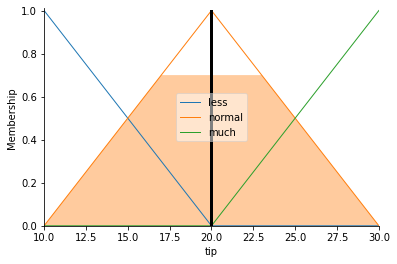

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor']& service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']& service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']& service['good'],tip['normal'])

rule4 = ctrl.Rule(food['average']& service['poor'],tip['normal'])
rule5 = ctrl.Rule(food['average']& service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']& service['good'],tip['normal'])

rule7 = ctrl.Rule(food['good']& service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']& service['average'],tip['normal'])
rule9 = ctrl.Rule(food['good']& service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 5
tipping.input['service'] = 6.5

tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping) 

Power used to cook rice: 95.00000000000001 %


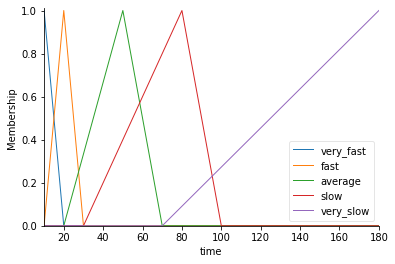

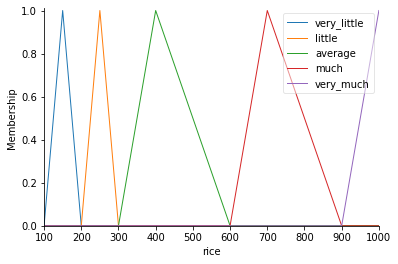

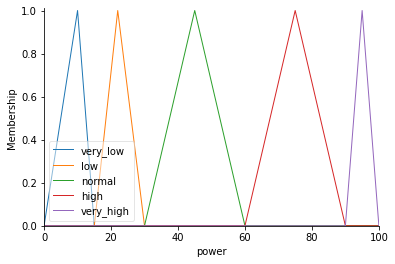

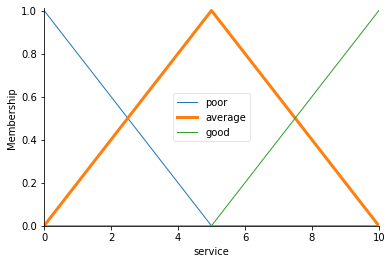

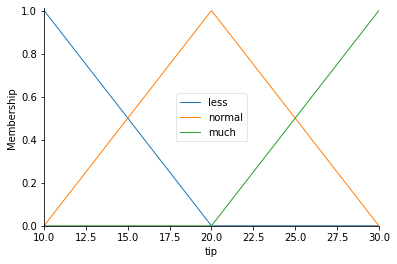

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')
time['very_fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[10,20,30])
time['average'] = fuzz.trimf(time.universe,[20,50,70])
time['slow'] = fuzz.trimf(time.universe,[30,80,100])
time['very_slow'] = fuzz.trimf(time.universe,[70,180,180])

rice['very_little'] = fuzz.trimf(rice.universe,[100,150,200])
rice['little'] = fuzz.trimf(rice.universe,[200,250,300])
rice['average'] = fuzz.trimf(rice.universe,[300,400,600])
rice['much'] = fuzz.trimf(rice.universe,[600,700,900])
rice['very_much'] = fuzz.trimf(rice.universe,[900,1000,1000])

power['very_low'] = fuzz.trimf(power.universe,[0,10,15])
power['low'] = fuzz.trimf(power.universe,[15,22,30])
power['normal'] = fuzz.trimf(power.universe,[30,45,60])
power['high'] = fuzz.trimf(power.universe,[60,75,90])
power['very_high'] = fuzz.trimf(power.universe,[90,95,100])

time.view()
rice.view()
power.view()
service['average'].view()

rule1 = ctrl.Rule(time['very_fast']& rice['very_little'],power['very_low'])
rule2 = ctrl.Rule(time['very_fast']& rice['little'],power['low'])
rule3 = ctrl.Rule(time['very_fast']& rice['average'],power['normal'])
rule4 = ctrl.Rule(time['very_fast']& rice['much'],power['high'])
rule5 = ctrl.Rule(time['very_fast']& rice['very_much'],power['very_high'])

rule6 = ctrl.Rule(time['fast']& rice['very_little'],power['very_low'])
rule7 = ctrl.Rule(time['fast'] & rice['little'],power['low'])
rule8 = ctrl.Rule(time['fast']& rice['average'],power['normal'])
rule9 = ctrl.Rule(time['fast']& rice['much'],power['high'])
rule10 = ctrl.Rule(time['fast']& rice['very_much'],power['very_high'])

rule11 = ctrl.Rule(time['average']& rice['very_little'],power['very_low'])
rule12 = ctrl.Rule(time['average']& rice['little'],power['low'])
rule13 = ctrl.Rule(time['average']& rice['average'],power['normal'])
rule14 = ctrl.Rule(time['average']& rice['much'],power['high'])
rule15 = ctrl.Rule(time['average']& rice['very_much'],power['very_high'])

rule16 = ctrl.Rule(time['slow']& rice['very_little'],power['low'])
rule17 = ctrl.Rule(time['slow']& rice['little'],power['low'])
rule18 = ctrl.Rule(time['slow']& rice['average'],power['normal'])
rule19 = ctrl.Rule(time['slow']& rice['much'],power['high'])
rule20 = ctrl.Rule(time['slow']& rice['very_much'],power['very_high'])

rule21 = ctrl.Rule(time['very_slow']& rice['very_little'],power['high'])
rule22 = ctrl.Rule(time['very_slow']& rice['little'],power['high'])
rule23 = ctrl.Rule(time['very_slow']& rice['average'],power['high'])
rule24 = ctrl.Rule(time['very_slow']& rice['much'],power['high'])
rule25 = ctrl.Rule(time['very_slow']& rice['very_much'],power['very_high'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,
                                   rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 50
powering.input['rice'] = 1000
powering.compute()
print('Power used to cook rice: {} %'.format(powering.output['power']))
tip.view(sim=powering)